<center><h1 style="color: purple;">ML/Feature Engineering</h1></center>
<center><h3 style="color: pink;">First project</h3><center>

In [1]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import scikitplot as skplt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**zadanie 1**

In [2]:
X_train=pd.read_csv("xtrain.csv")
X_test=pd.read_csv("xtest.csv")
y_train=pd.read_csv("ytrain.csv")
y_test=pd.read_csv("ytest.csv")

In [3]:
X_test=X_test.drop(['sex','CabinReduce','cabin'], axis=1)
X_train=X_train.drop(['sex','CabinReduce','cabin'], axis=1)

In [4]:
X_train.sample(10)

,sex_map,cabin_map,CabinReduce_map
139,0,0,8
584,0,0,8
127,0,0,8
734,1,0,8
409,0,185,3
254,0,0,8
803,0,0,8
176,0,0,8
312,0,152,3
546,1,0,8


In [5]:
low_card=[]
high_card=[]

<center><h3 style="color: magenta;">MODELE WYKORZYSTUJĄCE RÓŻNE ALGORYTMY</h3><center>

<center><h3 style="color:#9966FF;">Random Forest</h3><center>

Las losowy opiera się na tworzeniu wielu drzew decyzyjnych - wielu predyktorów.(ilość drzew w lesie). 
Wykorzystuje on agregacje boostrapową - losowanie ze zwracaniem z próby uczącej a następnie agragacje, aby zwiększyć dokładność predykcji. Tworzy on losowe zbiory, z których tworzone są następnie drzewa decyzyjne. Jeśli chcemy dokonać predykcji na podstawie drzew to wynikiem jest w uproszczeniu średni model dla wszystkich drzew - wybór większościowy.
Przykładowe parametry:
- n_estimators - ilość drzew w lesie
- max_depth - maksymalna głębokość drzewa

Dla mniejszej liczebności: 
- CabinReduce_map

In [6]:
#tworzenie modelu
RF=RandomForestClassifier(random_state=42)

#trenowanie modelu
RF.fit(X_train[['sex_map','CabinReduce_map']],y_train.values.ravel())
               
#predykcja
PredTrain=RF.predict_proba(X_train[['sex_map','CabinReduce_map']])
PredTest=RF.predict_proba(X_test[['sex_map','CabinReduce_map']])
train_res=roc_auc_score(y_train, PredTrain[:,1], multi_class='ovr')#prawdopodobienstwo ze przezyli
test_res=roc_auc_score(y_test, PredTest[:,1], multi_class='ovr')
difference=abs(train_res-test_res)
low_card.append({"qualityTest": test_res,"qualityTrain":train_res,"difference":difference})
print("Dla małej liczebności cechy cabin_map: ")
print("Ocena jakości klasyfikatora dla zbioru treningowego: {}".format(train_res))
print("Ocena jakości klasyfikatora dla zbioru testowego: {}".format(test_res))
print("Różnica pomiędzy testowym a treningowym: {}".format(difference))

Dla małej liczebności cechy cabin_map: 
Ocena jakości klasyfikatora dla zbioru treningowego: 0.816719415917359
Ocena jakości klasyfikatora dla zbioru testowego: 0.8011863281898125
Różnica pomiędzy testowym a treningowym: 0.015533087727546468


Text(0.5, 1.0, 'Test set')

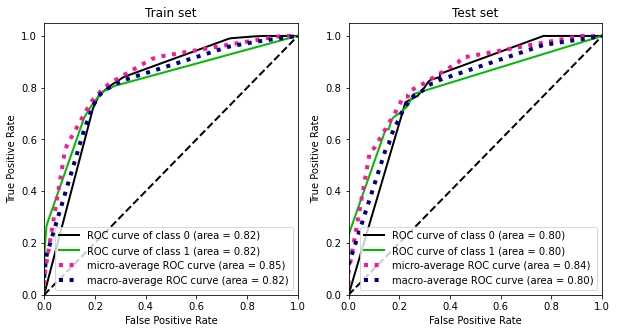

In [7]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
skplt.metrics.plot_roc(y_train, PredTrain,ax=axes[0])
axes[0].set_title('Train set')
skplt.metrics.plot_roc(y_test, PredTest,ax=axes[1])
axes[1].set_title('Test set')

Dla większej liczebności: 
- cabin_map

In [8]:
#tworzenie modelu
RF=RandomForestClassifier(random_state=42)

#trenowanie modelu
RF.fit(X_train[['sex_map','cabin_map']],y_train.values.ravel())
               
#predykcja
PredTrain=RF.predict_proba(X_train[['sex_map','cabin_map']])
PredTest=RF.predict_proba(X_test[['sex_map','cabin_map']])
train_res=roc_auc_score(y_train, PredTrain[:,1], multi_class='ovr')#prawdopodobienstwo ze przezyli
test_res=roc_auc_score(y_test, PredTest[:,1], multi_class='ovr')
difference=abs(train_res-test_res)
high_card.append({"qualityTest": test_res,"qualityTrain":train_res,"difference":difference})
print("Dla dużej liczebności cechy cabin_map: ")
print("Ocena jakości klasyfikatora dla zbioru treningowego: {}".format(train_res))
print("Ocena jakości klasyfikatora dla zbioru testowego: {}".format(test_res))
print("Różnica pomiędzy testowym a treningowym: {}".format(difference))

Dla dużej liczebności cechy cabin_map: 
Ocena jakości klasyfikatora dla zbioru treningowego: 0.8574914838053932
Ocena jakości klasyfikatora dla zbioru testowego: 0.7547148940877163
Różnica pomiędzy testowym a treningowym: 0.10277658971767689


Text(0.5, 1.0, 'Test set')

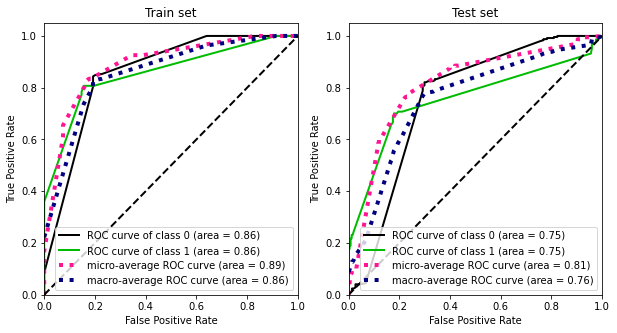

In [9]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
skplt.metrics.plot_roc(y_train, PredTrain,ax=axes[0])
axes[0].set_title('Train set')
skplt.metrics.plot_roc(y_test, PredTest,ax=axes[1])
axes[1].set_title('Test set')

**Jak różnią się wyniki dla danych z dużą liczebnością i niską
liczebnością cech. Gdzie widoczne jest zbyt duże dopasowanie?
Dlaczego?**

Dla danych z wysoką liczebnością cech widzimy większą różnicę pomiędzy wynikiem dla zbioru treningowego a zbioru testowego. Duża różnica świadczy o zbyt dużym dopasowaniu, model dopasował się zbyt dobrze do danych ze zbioru treningowego, a na testowym już wypada znacznie gorzej. Porównując z danymi o niskiej liczebności cech widzimy że wynik dla zbioru testowego jest niższy dla danych o wysokiej kardynalności.

Patrząc również na wykresy w pierwszym przypadku widzimy, że pola pod wykresem są do siebie bardziej zbliżone niż w drugim przypadku. 

<center><h3 style="color:#9966FF;">LogisticRegression</h3><center>

Jest to liniowy klasyfikator, podobny do regresji wielomianowej i regresji liniowej. Stosowana zazwyczaj do klasyfikacji binarnej - wynikiem jest 0 albo 1(np. czy przeżył czy nie). Nie przewiduje wartości zmiennej Y(jak w modelu regresji liniowej), a prawdopodobienstwo wystąpienia danej wartosci zmiennej Y bądź braku jej zaistnienia. Wykorzystuje się w niej funkcje sigmoidalną unipolarną oraz model logitowy, który pozwala zamiast prawdopodobieństwa wyznaczyć iloraz szans. Klasyfikator dokonuje klasyfikacji, gdzie dla rezultatów większych od 0.5 zwraca 1, a dla mniejszych bądź równych 0.5 zwraca 0.


Wrażliwa jest na braki w danych. Należy w niej uwzględniać tylko najistotniejsze zmienne oraz powinna być stosowana dla prób większych niż 100-200. Jeśli występują wartości odstające to dla tego klasyfikatora lepiej je usunąć.


Dla mniejszej liczebności: 
- CabinReduce_map

In [10]:
#tworzenie modelu
LR=LogisticRegression(random_state=42)

#trenowanie modelu
LR.fit(X_train[['sex_map','CabinReduce_map']],y_train.values.ravel())
               
#predykcja
PredTrain=LR.predict_proba(X_train[['sex_map','CabinReduce_map']])
PredTest=LR.predict_proba(X_test[['sex_map','CabinReduce_map']])
train_res=roc_auc_score(y_train, PredTrain[:,1], multi_class='ovr')#prawdopodobienstwo ze przezyli
test_res=roc_auc_score(y_test, PredTest[:,1], multi_class='ovr')
difference=abs(train_res-test_res)
low_card.append({"qualityTest": test_res,"qualityTrain":train_res,"difference":difference})
print("Dla małej liczebności cechy cabin_map: ")
print("Ocena jakości klasyfikatora dla zbioru treningowego: {}".format(train_res))
print("Ocena jakości klasyfikatora dla zbioru testowego: {}".format(test_res))
print("Różnica pomiędzy testowym a treningowym: {}".format(difference))

Dla małej liczebności cechy cabin_map: 
Ocena jakości klasyfikatora dla zbioru treningowego: 0.81300097112293
Ocena jakości klasyfikatora dla zbioru testowego: 0.801932968309275
Różnica pomiędzy testowym a treningowym: 0.011068002813655053


Text(0.5, 1.0, 'Test set')

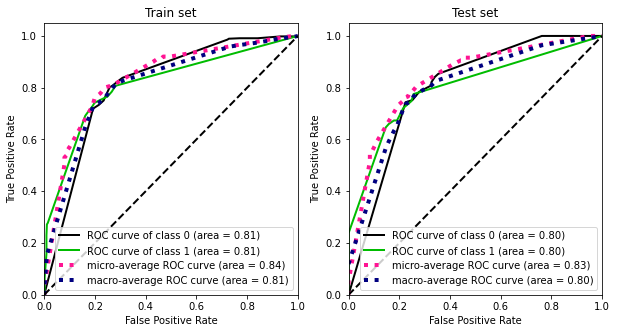

In [11]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
skplt.metrics.plot_roc(y_train, PredTrain,ax=axes[0])
axes[0].set_title('Train set')
skplt.metrics.plot_roc(y_test, PredTest,ax=axes[1])
axes[1].set_title('Test set')

Dla większej liczebności: 
- cabin_map

In [12]:
#tworzenie modelu
LR=LogisticRegression(random_state=42)

#trenowanie modelu
LR.fit(X_train[['sex_map','cabin_map']],y_train.values.ravel())
               
#predykcja
PredTrain=LR.predict_proba(X_train[['sex_map','cabin_map']])
PredTest=LR.predict_proba(X_test[['sex_map','cabin_map']])
train_res=roc_auc_score(y_train, PredTrain[:,1], multi_class='ovr')#prawdopodobienstwo ze przezyli
test_res=roc_auc_score(y_test, PredTest[:,1], multi_class='ovr')
difference=abs(train_res-test_res)
high_card.append({"qualityTest": test_res,"qualityTrain":train_res,"difference":difference})
print("Dla dużej liczebności cechy cabin_map: ")
print("Ocena jakości klasyfikatora dla zbioru treningowego: {}".format(train_res))
print("Ocena jakości klasyfikatora dla zbioru testowego: {}".format(test_res))
print("Różnica pomiędzy testowym a treningowym: {}".format(difference))

Dla dużej liczebności cechy cabin_map: 
Ocena jakości klasyfikatora dla zbioru treningowego: 0.8116071832906476
Ocena jakości klasyfikatora dla zbioru testowego: 0.802762568442011
Różnica pomiędzy testowym a treningowym: 0.008844614848636634


Text(0.5, 1.0, 'Test set')

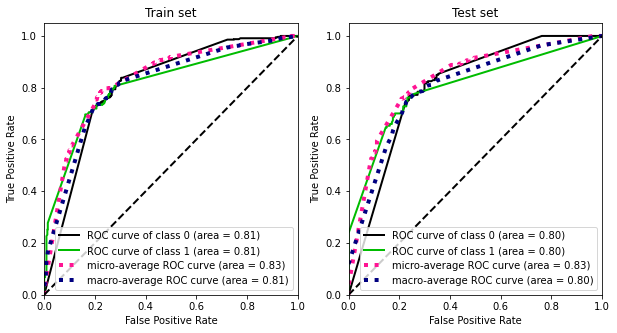

In [13]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
skplt.metrics.plot_roc(y_train, PredTrain,ax=axes[0])
axes[0].set_title('Train set')
skplt.metrics.plot_roc(y_test, PredTest,ax=axes[1])
axes[1].set_title('Test set')

**Jak różnią się wyniki dla danych z dużą liczebnością i niską
liczebnością cech. Gdzie widoczne jest zbyt duże dopasowanie?
Dlaczego?**

W tym przypadku różnice są mniejsze. Dla mniejszej liczebności cech różnica wyszła tym razem większa niż dla większej liczebności cech - jednak niewiele się różnią. Większą tendencje do zbyt dużego dopasowania zauważam dla mniejszej liczebności cech.

Krzywe dla zbiorów testowych są podobne.

<center><h3 style="color:#9966FF;">GradientBoostingClassifier</h3><center>

Głównym zadaniem tego klasyfikatora jest zwiększanie jego gradientu. Modelem predykcyjnym jest model złożony ze słabych modeli predykcyjnych - drzew decyzyjnych, używanych podczas wzmacniania gradientu. Każdy nowy model robi krok w kierunku, który minimalizuje błąd predykcji, błąd swojego poprzednika.
Wzmocnienie gradientu jest dość odporne na nadmierne dopasowanie, więc duża liczba etapów wzmocnienia zwykle skutkuje lepszą wydajnością.
Przykładowe parametry:
- loss - funkcja straty do zoptymalizowania
- n_estimators - liczba etapów wzmocnienia do przeprowadzenia

Dla mniejszej liczebności: 
- CabinReduce_map

In [14]:
#tworzenie modelu
GB=GradientBoostingClassifier(random_state=42)

#trenowanie modelu
GB.fit(X_train[['sex_map','CabinReduce_map']],y_train.values.ravel())
               
#predykcja
PredTrain=GB.predict_proba(X_train[['sex_map','CabinReduce_map']])
PredTest=GB.predict_proba(X_test[['sex_map','CabinReduce_map']])
train_res=roc_auc_score(y_train, PredTrain[:,1], multi_class='ovr')#prawdopodobienstwo ze przezyli
test_res=roc_auc_score(y_test, PredTest[:,1], multi_class='ovr')
difference=abs(train_res-test_res)
low_card.append({"qualityTest": test_res,"qualityTrain":train_res,"difference":difference})
print("Dla małej liczebności cechy cabin_map: ")
print("Ocena jakości klasyfikatora dla zbioru treningowego: {}".format(train_res))
print("Ocena jakości klasyfikatora dla zbioru testowego: {}".format(test_res))
print("Różnica pomiędzy testowym a treningowym: {}".format(difference))

Dla małej liczebności cechy cabin_map: 
Ocena jakości klasyfikatora dla zbioru treningowego: 0.816719415917359
Ocena jakości klasyfikatora dla zbioru testowego: 0.8013245948786019
Różnica pomiędzy testowym a treningowym: 0.015394821038757112


Text(0.5, 1.0, 'Test set')

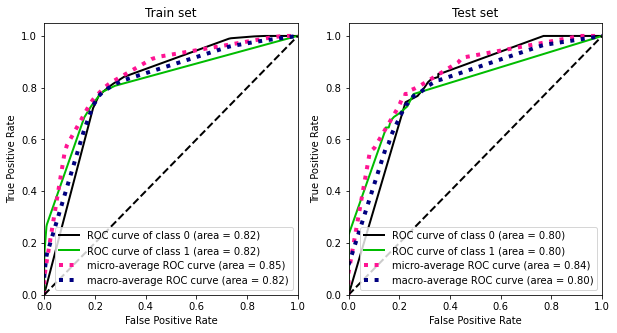

In [15]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
skplt.metrics.plot_roc(y_train, PredTrain,ax=axes[0])
axes[0].set_title('Train set')
skplt.metrics.plot_roc(y_test, PredTest,ax=axes[1])
axes[1].set_title('Test set')

Dla większej liczebności: 
- cabin_map

In [16]:
#tworzenie modelu
GB=GradientBoostingClassifier(random_state=42)

#trenowanie modelu
GB.fit(X_train[['sex_map','cabin_map']],y_train.values.ravel())
               
#predykcja
PredTrain=GB.predict_proba(X_train[['sex_map','cabin_map']])
PredTest=GB.predict_proba(X_test[['sex_map','cabin_map']])
train_res=roc_auc_score(y_train, PredTrain[:,1], multi_class='ovr')#prawdopodobienstwo ze przezyli
test_res=roc_auc_score(y_test, PredTest[:,1], multi_class='ovr')
difference=abs(train_res-test_res)
high_card.append({"qualityTest": test_res,"qualityTrain":train_res,"difference":difference})
print("Dla dużej liczebności cechy cabin_map: ")
print("Ocena jakości klasyfikatora dla zbioru treningowego: {}".format(train_res))
print("Ocena jakości klasyfikatora dla zbioru testowego: {}".format(test_res))
print("Różnica pomiędzy testowym a treningowym: {}".format(difference))

Dla dużej liczebności cechy cabin_map: 
Ocena jakości klasyfikatora dla zbioru treningowego: 0.8485148863584904
Ocena jakości klasyfikatora dla zbioru testowego: 0.7710718433714949
Różnica pomiędzy testowym a treningowym: 0.07744304298699545


Text(0.5, 1.0, 'Test set')

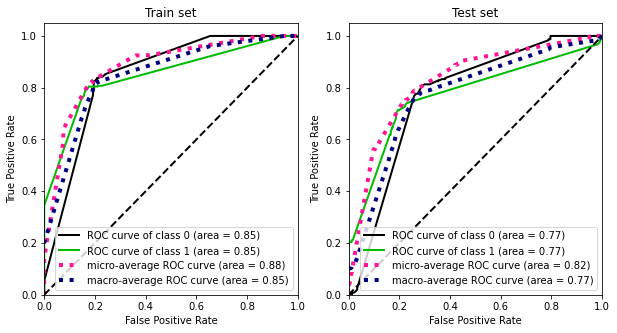

In [17]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
skplt.metrics.plot_roc(y_train, PredTrain,ax=axes[0])
axes[0].set_title('Train set')
skplt.metrics.plot_roc(y_test, PredTest,ax=axes[1])
axes[1].set_title('Test set')

**Jak różnią się wyniki dla danych z dużą liczebnością i niską
liczebnością cech. Gdzie widoczne jest zbyt duże dopasowanie?
Dlaczego?**

Dla większej liczebności kabin mamy większą różnicę, zatem większą tendencję do overfittingu. Dla mniejszej liczebności również mamy większą wartość dla danych treningowych w porównaniu do testowych, jednak różnica pomiędzy nimi (0.015)jest znacznie mniejsza od danych o wysokiej kardynalności(0.077).

Porównując wykresy dla testowego zbioru danych widać, że większe pole pod wykresem mamy dla danych o niższej kardynalności.

<center><h3 style="color:#9966FF;">AdaBoostClassifier</h3><center>

Łączy wiele słabych modeli w jeden silny model predykcyjny. W kolejnych iteracjach trenuje, a później sprawdza błąd dla wszystkch słabych modeli. Te obserwacje, które źle zostały zakwalifikowane zyskują na ważności i na nich skupiana jest największa uwaga.

- base_estimator - domyślnie to DecisionTreeClasifier, jest to estymator bazowy, z którego tworzony jest zespół wzmacniany
- n_estimators - maksymalna liczba estymatorów, przy której kończy się wzmacnianie, ale gdy wcześniej nastąpi dopasowanie to procedura uczenia zostaje zakończona wcześniej.


Dla mniejszej liczebności: 
- CabinReduce_map

In [18]:
#tworzenie modelu
AB=AdaBoostClassifier(random_state=42)

#trenowanie modelu
AB.fit(X_train[['sex_map','CabinReduce_map']],y_train.values.ravel())
               
#predykcja
PredTrain=AB.predict_proba(X_train[['sex_map','CabinReduce_map']])
PredTest=AB.predict_proba(X_test[['sex_map','CabinReduce_map']])
train_res=roc_auc_score(y_train, PredTrain[:,1], multi_class='ovr')#prawdopodobienstwo ze przezyli
test_res=roc_auc_score(y_test, PredTest[:,1], multi_class='ovr')
difference=abs(train_res-test_res)
low_card.append({"qualityTest": test_res,"qualityTrain":train_res,"difference":difference})
print("Dla małej liczebności cechy cabin_map: ")
print("Ocena jakości klasyfikatora dla zbioru treningowego: {}".format(train_res))
print("Ocena jakości klasyfikatora dla zbioru testowego: {}".format(test_res))
print("Różnica pomiędzy testowym a treningowym: {}".format(difference))

Dla małej liczebności cechy cabin_map: 
Ocena jakości klasyfikatora dla zbioru treningowego: 0.8158388640377581
Ocena jakości klasyfikatora dla zbioru testowego: 0.8005226480836237
Różnica pomiędzy testowym a treningowym: 0.015316215954134349


Text(0.5, 1.0, 'Test set')

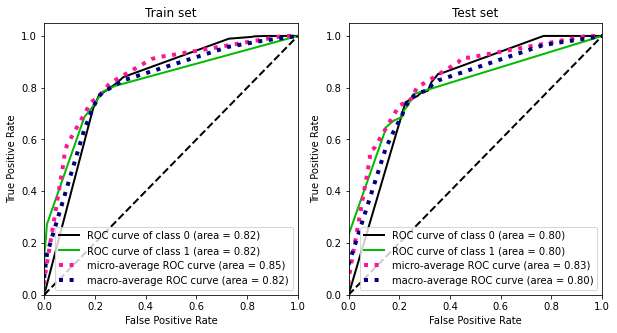

In [19]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
skplt.metrics.plot_roc(y_train, PredTrain,ax=axes[0])
axes[0].set_title('Train set')
skplt.metrics.plot_roc(y_test, PredTest,ax=axes[1])
axes[1].set_title('Test set')

Dla większej liczebności: 
- cabin_map

In [20]:
#tworzenie modelu
AB=AdaBoostClassifier(random_state=42)

#trenowanie modelu
AB.fit(X_train[['sex_map','cabin_map']],y_train.values.ravel())
               
#predykcja
PredTrain=AB.predict_proba(X_train[['sex_map','cabin_map']])
PredTest=AB.predict_proba(X_test[['sex_map','cabin_map']])
train_res=roc_auc_score(y_train, PredTrain[:,1], multi_class='ovr')#prawdopodobienstwo ze przezyli
test_res=roc_auc_score(y_test, PredTest[:,1], multi_class='ovr')
difference=abs(train_res-test_res)
high_card.append({"qualityTest": test_res,"qualityTrain":train_res,"difference":difference})
print("Dla dużej liczebności cechy cabin_map: ")
print("Ocena jakości klasyfikatora dla zbioru treningowego: {}".format(train_res))
print("Ocena jakości klasyfikatora dla zbioru testowego: {}".format(test_res))
print("Różnica pomiędzy testowym a treningowym: {}".format(difference))

Dla dużej liczebności cechy cabin_map: 
Ocena jakości klasyfikatora dla zbioru treningowego: 0.8302950100382914
Ocena jakości klasyfikatora dla zbioru testowego: 0.7954067805984183
Różnica pomiędzy testowym a treningowym: 0.03488822943987313


Text(0.5, 1.0, 'Test set')

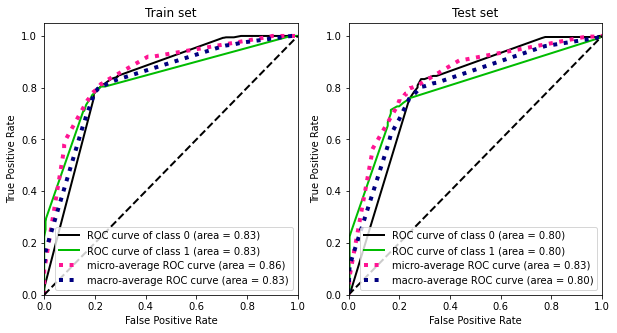

In [21]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
skplt.metrics.plot_roc(y_train, PredTrain,ax=axes[0])
axes[0].set_title('Train set')
skplt.metrics.plot_roc(y_test, PredTest,ax=axes[1])
axes[1].set_title('Test set')

**Jak różnią się wyniki dla danych z dużą liczebnością i niską
liczebnością cech. Gdzie widoczne jest zbyt duże dopasowanie?
Dlaczego?**

W tym przypadku kolejny raz większą tendencję do nadmiernego dopasowania mają dane o wysokiej kardynalności - różnica około 0.035, a dla mniejszej kardynalności około 0.015. 

Jeśli chodzi o wykresy to pole pod wykresem dla zbiorów testowych jest zbliżone.

<center><h3 style="color: magenta;">PORÓWNANIE ALGORYTMÓW</h3><center>
<center><h3 style="color: pink;">Który ma największą tendencję do nadmiernego dopasowania?</h3><center>

In [22]:
columns=["RandomForrest","LogisticRegression","GradientBoostingClasiffier","AdaBoostClassifier"]
res_low_card=pd.DataFrame(low_card, index=columns)
res_high_card=pd.DataFrame(high_card, index=columns)

In [23]:
res_low_card

,qualityTest,qualityTrain,difference
RandomForrest,0.801186,0.816719,0.015533
LogisticRegression,0.801933,0.813001,0.011068
GradientBoostingClasiffier,0.801325,0.816719,0.015395
AdaBoostClassifier,0.800523,0.815839,0.015316


In [24]:
res_high_card

,qualityTest,qualityTrain,difference
RandomForrest,0.754715,0.857491,0.102777
LogisticRegression,0.802763,0.811607,0.008845
GradientBoostingClasiffier,0.771072,0.848515,0.077443
AdaBoostClassifier,0.795407,0.830295,0.034888


**Porównanie:**

ROC to krzywa, która pozwala ocenić nasz model. Krzywe, które są bliżej lewego górnego rogu są wydajniejsze - a dokładniej te, które mają większe pole pod wykresem. Krzywa na przekątnej pokazuje nam jakby punkt odniesienia, w którym pokazane jest, że proporcja osób, które zostały dobrze zakwalifikowane jako osoby które przeżyły jest taka sama jak proporcja osób, które zostały źle zakwalifikowane jako osoby, które przeżyły. Zatem im bliżej krzywej na przekątnej tym nasz model jest mniej dokładny. 

Porównując wyniki ROC dla testowego zbioru **dla małej liczebności** cech wyniki dla różnych klasyfikatorów są bardzo zbliżone i oscylują około 0.8. **Najlepiej wypadła regresja logistyczna, a najgorzej AdaBoost.** Dla **dużej liczebności cech** mamy już większe zróżnicowanie w wynikach. **Najlepiej wypadła wciąż regresja logistyczna. A najgorzej Random Forest.** Wyniki dla większej liczebności cech dały większy wynik jeśli chodzi o regresje logistyczną. Jednakże, przy innych algorytmach w każdym przypadku mniejsza liczebność cech byłaby lepszym rozwiązaniem. 

**Który ma największą tendencję do nadmiernego dopasowania?** Porównując różnice pomiędzy zbiorem testowym a walidacyjnym/treningowym zarówno dla małej liczebności cech oraz dużej największą tendencję do nadmiernego dopasowania ma **Random Forest**, ale także GradientBoostingClassifier. - największe różnice.

**Podsumowując najlepszym klasyfikatorem na podstawie moich rozważań jest Regresja Logistyczna.**

<center><h3 style="color: magenta;">RÓŻNICA POMIĘDZY PREDICT A PREDICT_PROBA</h3><center>

**predict** - wyznacza nam wartości binarne tylko 0 i 1. Czyli czy osoba przeżyła - 1, czy nie - 0.

**predict_proba** - wyznacza nam prawdopodobieństwo 0-1. Dostajemy w naszym przypadku tablice z dwiema kolumnami - mamy dwie kategorie czy osoba przeżyła czy nie. Gdyby było więcej kategorii to dostalibyśmy więcej kolumn w tablicy. Pierwsza kolumna w tablicy odnosi się do prawdopodobieństwa, że dana osoba przeżyła, zaś druga wartość do prawdopoodbieństwa że nie przeżyła. 

z ostatniego przykładu:

In [25]:
PredTest_proba=AB.predict_proba(X_test[['sex_map','cabin_map']])
PredTest_predict=AB.predict(X_test[['sex_map','cabin_map']])
print("Wartości z predict_proba: {}".format(PredTest_proba[:5,]))
print("Wartości z predict: {}".format(PredTest_predict[:5,]))

Wartości z predict_proba: [[0.50910028 0.49089972]
 [0.49684163 0.50315837]
 [0.50910028 0.49089972]
 [0.50910028 0.49089972]
 [0.50910028 0.49089972]]
Wartości z predict: [0 1 0 0 0]


Dla wartości z predict_proba z pierwszego wiersza - prawdopodobieństwo, że ktoś nie przeżył wynosi około 0.51, a prawdopodobieństwo że przeżył - około 0.49.
Dla wartości z predict dla tej samej osoby wyszło 0 - czyli nie przeżyła.